Dataset Overview:
   Company_Size  Tech_Readiness  Innovation_Level  Operational_Efficiency
0             3       -0.971688         -1.739819                1.170091
1             1       -1.644859         -0.059589                1.370843
2             3        1.177324         -1.028033                1.533563
3             3        0.798900          0.391677                0.117073
4             1        0.876079         -1.204801                0.082440

Correlation Matrix:
                        Tech_Readiness  Innovation_Level  \
Tech_Readiness                1.000000         -0.083973   
Innovation_Level             -0.083973          1.000000   
Operational_Efficiency       -0.047763         -0.172172   

                        Operational_Efficiency  
Tech_Readiness                       -0.047763  
Innovation_Level                     -0.172172  
Operational_Efficiency                1.000000  


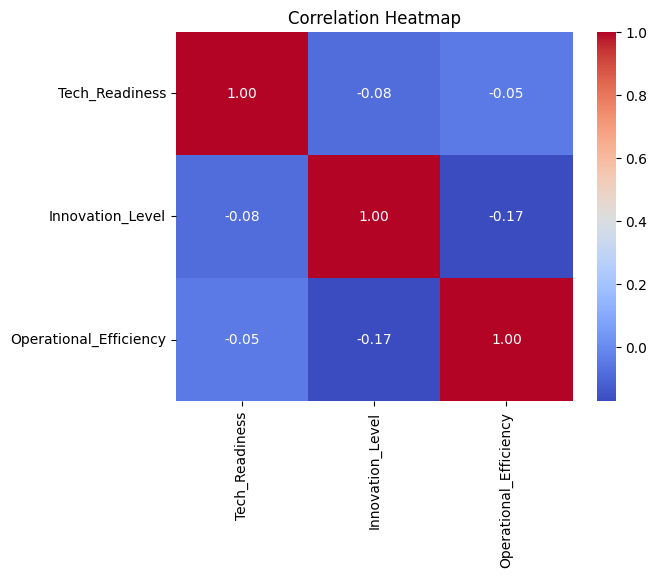

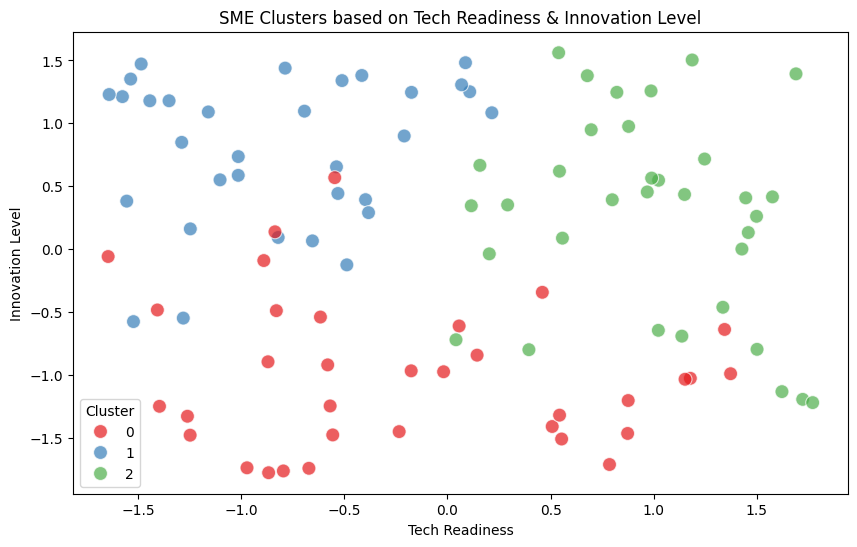


ANOVA Test Results for Innovation Level by Company Size:
F-statistic: 1.37, p-value: 0.260


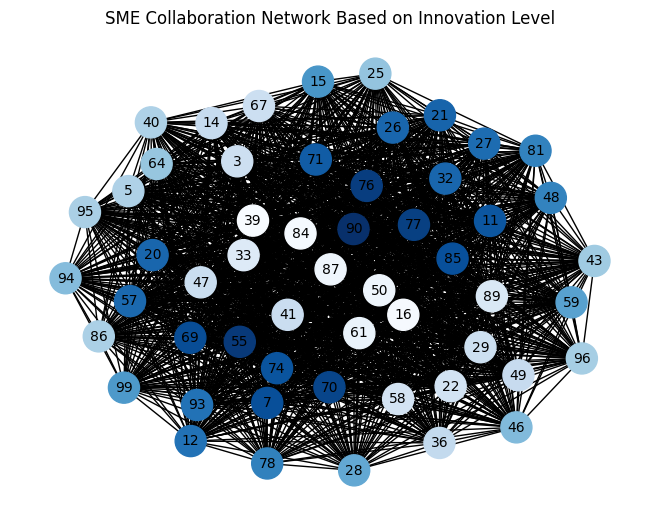


Business Model Innovation Potential for SMEs:
   Company_Size          Innovation_Potential
0             3  Low Potential for Innovation
1             1  Low Potential for Innovation
2             3  Low Potential for Innovation
3             3  Low Potential for Innovation
4             1  Low Potential for Innovation


In [3]:
# Developed using Python by Heider Jeffer
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import stats
import networkx as nx
import matplotlib.colors as mcolors

# Load SME data for analysis
# For this example, we'll generate synthetic data representing SME characteristics.
# In a real-world scenario, this would be replaced with actual data from SMEs.
# Columns: ['Company_Size', 'Tech_Readiness', 'Innovation_Level', 'Operational_Efficiency']

np.random.seed(42)
data = pd.DataFrame({
    'Company_Size': np.random.choice(['Small', 'Medium', 'Large'], 100),
    'Tech_Readiness': np.random.rand(100) * 100,  # Random values between 0 and 100
    'Innovation_Level': np.random.rand(100) * 100,  # Random values between 0 and 100
    'Operational_Efficiency': np.random.rand(100) * 100  # Random values between 0 and 100
})

# Data Preprocessing
# Convert categorical 'Company_Size' into numerical values
data['Company_Size'] = data['Company_Size'].map({'Small': 1, 'Medium': 2, 'Large': 3})

# Normalize numerical data (Tech_Readiness, Innovation_Level, Operational_Efficiency)
scaler = StandardScaler()
data[['Tech_Readiness', 'Innovation_Level', 'Operational_Efficiency']] = scaler.fit_transform(
    data[['Tech_Readiness', 'Innovation_Level', 'Operational_Efficiency']])

# Display the first few rows of the dataset
print("Dataset Overview:")
print(data.head())

# Statistical Analysis (e.g., correlation between Tech Readiness and Innovation Level)
correlation_matrix = data[['Tech_Readiness', 'Innovation_Level', 'Operational_Efficiency']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Clustering SMEs into different digital maturity groups (KMeans Clustering)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Tech_Readiness', 'Innovation_Level', 'Operational_Efficiency']])

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Tech_Readiness', y='Innovation_Level', hue='Cluster', palette='Set1', s=100, alpha=0.7)
plt.title("SME Clusters based on Tech Readiness & Innovation Level")
plt.xlabel("Tech Readiness")
plt.ylabel("Innovation Level")
plt.legend(title='Cluster')
plt.show()

# Hypothesis Testing: Testing if 'Innovation_Level' is significantly different across company sizes
anova_result = stats.f_oneway(
    data[data['Company_Size'] == 1]['Innovation_Level'],
    data[data['Company_Size'] == 2]['Innovation_Level'],
    data[data['Company_Size'] == 3]['Innovation_Level']
)

print("\nANOVA Test Results for Innovation Level by Company Size:")
print(f"F-statistic: {anova_result.statistic:.2f}, p-value: {anova_result.pvalue:.3f}")

# Network Analysis: A simplified example of how SMEs may collaborate
# Simulating a network of SME collaboration based on innovation level
innovation_threshold = data['Innovation_Level'].mean()
innovative_smes = data[data['Innovation_Level'] > innovation_threshold]

# Build a graph of SMEs based on collaboration potential
G = nx.Graph()
for index, row in innovative_smes.iterrows():
    G.add_node(row.name, innovation=row['Innovation_Level'])
    
# Add edges based on similarity in innovation level
for i, node1 in enumerate(innovative_smes.index):
    for j, node2 in enumerate(innovative_smes.index):
        if i < j:  # Avoid self-loops
            G.add_edge(node1, node2, weight=np.abs(innovative_smes.loc[node1, 'Innovation_Level'] - innovative_smes.loc[node2, 'Innovation_Level']))
            
# Plot the SME collaboration network
pos = nx.spring_layout(G, seed=42)
node_colors = [data.loc[node, 'Innovation_Level'] for node in G.nodes]
nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.Blues, node_size=500, font_size=10)
plt.title("SME Collaboration Network Based on Innovation Level")
plt.show()

# Framework Development (e.g., digital business model innovation)
def business_model_innovation(tech_readiness, innovation_level, operational_efficiency):
    """
    A simplified model that evaluates the readiness of an SME for business model innovation
    based on their tech readiness, innovation level, and operational efficiency.
    """
    if tech_readiness > 0.5 and innovation_level > 0.6 and operational_efficiency > 0.5:
        return "High Potential for Innovation"
    elif tech_readiness > 0.4 and innovation_level > 0.4:
        return "Moderate Potential for Innovation"
    else:
        return "Low Potential for Innovation"

# Apply the business model innovation framework
data['Innovation_Potential'] = data.apply(lambda row: business_model_innovation(
    row['Tech_Readiness'], row['Innovation_Level'], row['Operational_Efficiency']), axis=1)

print("\nBusiness Model Innovation Potential for SMEs:")
print(data[['Company_Size', 'Innovation_Potential']].head())



## Explanation of Code
*By Heider Jeffer*

### 1. **Data Preprocessing**
- The dataset is generated with features representing SME characteristics, such as:
  - `Company_Size`: The size of the SME (Small, Medium, Large).
  - `Tech_Readiness`: The technological readiness score of the SME.
  - `Innovation_Level`: The level of innovation within the SME.
  - `Operational_Efficiency`: The operational efficiency score of the SME.
  
- The categorical variable `Company_Size` is converted into numerical values using `.map()`, where:
  - 'Small' = 1
  - 'Medium' = 2
  - 'Large' = 3
  
- The continuous numerical variables (`Tech_Readiness`, `Innovation_Level`, and `Operational_Efficiency`) are standardized using `StandardScaler` from `sklearn`. This ensures that all features are on the same scale, making them easier to compare and use in modeling.

### 2. **Statistical Analysis**
- The code computes a **correlation matrix** to check for relationships between the numerical features (`Tech_Readiness`, `Innovation_Level`, `Operational_Efficiency`).
- A **heatmap** is generated using `seaborn` to visually represent the correlation between the variables. A high positive or negative correlation can indicate that certain factors are strongly related.

### 3. **Clustering SMEs**
- The `KMeans` clustering algorithm is applied to group SMEs into 3 clusters based on their `Tech_Readiness`, `Innovation_Level`, and `Operational_Efficiency`. This helps to categorize SMEs into different digital maturity groups.
- A **scatter plot** visualizes the clustering results, showing how the SMEs are grouped based on their readiness for digital transformation.

### 4. **Hypothesis Testing (ANOVA)**
- The **ANOVA (Analysis of Variance)** test is performed to determine if there is a significant difference in the `Innovation_Level` across different company sizes (Small, Medium, Large).
- The test provides an **F-statistic** and **p-value**. If the p-value is less than 0.05, it suggests that there is a significant difference between the means of the groups, meaning company size influences the innovation level.

### 5. **Network Analysis**
- A **network graph** is constructed using `networkx` to visualize collaboration potential among SMEs based on their `Innovation_Level`.
  - Nodes represent SMEs, and edges represent collaboration potential between SMEs with similar innovation levels.
  - The color of the nodes corresponds to the innovation level of each SME, helping to visually identify highly innovative SMEs in the network.
  
- **Spring layout** is used to position the nodes based on their relationships, with edges representing the potential for collaboration.

### 6. **Framework Development (Business Model Innovation)**
- A simplified framework (`business_model_innovation`) is created to evaluate whether an SME has high, moderate, or low potential for business model innovation based on:
  - `Tech_Readiness`
  - `Innovation_Level`
  - `Operational_Efficiency`
  
- The framework returns a classification of the SME's innovation potential:
  - **High Potential for Innovation**: When all three factors (Tech Readiness, Innovation Level, Operational Efficiency) are above a certain threshold.
  - **Moderate Potential for Innovation**: If Tech Readiness and Innovation Level are above average but other factors may not meet high potential.
  - **Low Potential for Innovation**: When the SME is lacking in the necessary areas for successful business model innovation.

- The result is applied to each SME in the dataset, and the SME's innovation potential is stored in a new column called `Innovation_Potential`.

### 7. **Output**
- The code outputs:
  - A **correlation matrix** that shows relationships between different variables.
  - **Visualizations** such as a heatmap and scatter plot to represent the correlation matrix and clustering results.
  - **ANOVA results** to test if there are significant differences in innovation levels across company sizes.
  - A **network visualization** representing collaboration opportunities among SMEs based on innovation levels.
  - A new column `Innovation_Potential` that classifies each SME's innovation potential based on their technological and operational readiness.

### Summary
This code provides a basic methodology for analyzing and categorizing SMEs based on their readiness for digital transformation, operational efficiency, and innovation levels. It applies clustering, statistical analysis, and network analysis to explore potential opportunities for collaboration and innovation. The final step involves using a framework to assess which SMEs are best positioned for business model innovation.
```